#**Importing the dataset**

In [ ]:
!git clone -l -s git://github.com/AshraqatM/ML_Final_Project.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (4/4), 208.88 KiB | 495.00 KiB/s, done.
/content/cloned-repo/cloned-repo
pendigits-tes.csv  pendigits-tra.csv


# **Functions**

In [ ]:
#load and prepare the data
import pandas as pd
import numpy as np

def prepareData():
  train_data = pd.read_csv("pendigits-tra.csv", header= None)
  test_data = pd.read_csv("pendigits-tes.csv", header= None)
  #print(train_data.head())
  x_train = train_data.iloc[:, 0:16]
  y_train = train_data[16]
  x_test = test_data.iloc[:, 0:16]
  y_test = test_data[16]

  return np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)


In [ ]:
#Information about the data distribution
def dataInfo():
  print(f'Training set shape: {x_train.shape}')
  print(f'Test set shape: {x_test.shape}')
  unique, count = np.unique(y_train, return_counts=True)
  print(f'Training distribution: {dict(zip(unique, count))}')
  unique, count = np.unique(y_test, return_counts=True)
  print(f'Testing distribution: {dict(zip(unique, count))}')

In [ ]:
#Apply scaling 
from sklearn.preprocessing import MinMaxScaler

def dataScaling(x_train, x_test):
  scaler = MinMaxScaler()
  x_train = scaler.fit_transform(x_train)
  x_test = scaler.transform(x_test)

  return x_train, x_test


In [ ]:
#plot dataset
import matplotlib.pyplot as plt

def plotDataset(X, y, title=''):
  for label in np.unique(y):
    plt.scatter(X[y == label, 0], X[y == label, 1], label=label)
  
  plt.title(title)
  plt.legend()
  plt.show()

In [ ]:
def plotModels(models, title = '', xlabel = '', ylabel = ''):
  for i in models:
    plt.bar(i[0], i[1])

  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

In [ ]:
#plot TSNE
from sklearn.manifold import TSNE
import plotly.express as px

def plotTSNE(x, y, title = ''):
  tsne = TSNE(n_components= 2, random_state= rs).fit_transform(x)
  fig = px.scatter(x=tsne[:,0], y=tsne[:,1], color= y, title= title)
  fig.update_layout(height=900)
  fig.show()

In [ ]:
#Feature Selection (ANOVA)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

def feature_selection(k,  model = None):
  
  X_total = np.concatenate((x_train, x_test), axis=0)
  Y_total = np.concatenate((y_train, y_test), axis=0)
  chi_squ = SelectKBest(score_func=f_classif, k= k)
  new_dataset=chi_squ.fit_transform(X_total, Y_total)
  train_row = int(np.size(x_train, 0))
  test_row = int(np.size(x_test, 0))
  total_row = train_row + test_row
  x_train_reduced = new_dataset[:train_row, :]
  x_test_reduced = new_dataset[train_row:total_row, :]

  if model == "MLP":
    accuracy_mlp = MLP(x_train_reduced,x_test_reduced)
    return accuracy_mlp
  elif model == "tree":
    acc_tree = decision_tree(x_train_reduced,x_test_reduced)
    return acc_tree
  elif model == "gradient":
    acc_GB = GB(x_train_reduced,x_test_reduced)
    return acc_GB


  elif model == None:
    return x_train_reduced, x_test_reduced
  #elif model == "" 

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def decision_tree(x_train,x_test):
  tree_clf = DecisionTreeClassifier(random_state=rs).fit(x_train, y_train)
  y_pred_tree = tree_clf.predict(x_test)
  accuracy_tree = accuracy_score(y_test, y_pred_tree)

  return accuracy_tree

In [ ]:
#MLP
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

def MLP(x_train, x_test):
  mlp_clf = MLPClassifier(learning_rate_init=0.1, max_iter=1000, activation='tanh', random_state=rs).fit(x_train, y_train)
  y_pred_mlp = mlp_clf.predict(x_test)
  accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
  
  return accuracy_mlp

In [ ]:
#Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier

def GB(x_train, x_test , learning_rate=0.1 ,n_estimators=100 , max_depth=3):
  GB_clf = GradientBoostingClassifier(learning_rate=learning_rate,n_estimators=n_estimators, max_depth=max_depth, random_state=rs).fit(x_train, y_train)
  y_pred_GB = GB_clf.predict(x_test)
  accuracy_GB = accuracy_score(y_test,  y_pred_GB)

  return accuracy_GB

In [ ]:
#Update Baseline

def update_baseline(models):
  acc_baseline = models[0][1]
  acc_1 = models[1][1]
  acc_2 = models[2][1]
  acc_3 = models[3][1]
  if (acc_baseline < acc_1 or  acc_baseline < acc_2 or  acc_baseline < acc_3):
    if acc_1 > acc_2:
      if acc_1 > acc_3:
        acc_baseline = acc_1
      else :
        acc_baseline = acc_3
    else:
      acc_baseline = acc_2

  return acc_baseline


# **Main**

Training set shape: (7494, 16)
Test set shape: (3498, 16)
Training distribution: {0: 780, 1: 779, 2: 780, 3: 719, 4: 780, 5: 720, 6: 720, 7: 778, 8: 719, 9: 719}
Testing distribution: {0: 363, 1: 364, 2: 364, 3: 336, 4: 364, 5: 335, 6: 336, 7: 364, 8: 336, 9: 336}


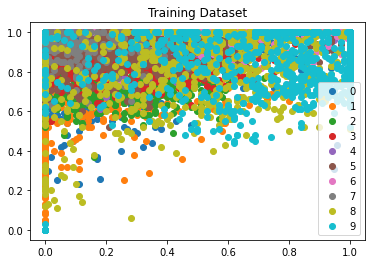

In [ ]:
x_train, y_train, x_test, y_test = prepareData()
dataInfo()
#scaling
x_train, x_test = dataScaling(x_train, x_test)
#plot
plotDataset(x_train, y_train, 'Training Dataset')
#np.unique( y_test)

In [ ]:
#Global Variables 
acc_baseline = []
rs = 0

# **Baseline Performance**

**MLP**

In [ ]:
mlp_baseline =mlp_acc_1 = MLP(x_train, x_test) 
print('Accuracy of MLP: ', mlp_baseline)
acc_baseline.append(['MLP', mlp_baseline])

Accuracy of MLP:  0.9591194968553459


**Decision Tree**

In [ ]:
tree_baseline = tree_acc_1 = decision_tree(x_train,x_test)
print('Accuracy of Decision Tree: ', tree_baseline)
acc_baseline.append(['Decision tree', tree_baseline])

Accuracy of Decision Tree:  0.9213836477987422


**Gradient Boost**

In [ ]:
GB_baseline = gb_acc_1 = GB(x_train ,x_test )
print('Accuracy of Gradient Boos: ',  GB_baseline)
acc_baseline.append(['Gradient Boost',  GB_baseline])

Accuracy of Gradient Boos:  0.9625500285877644


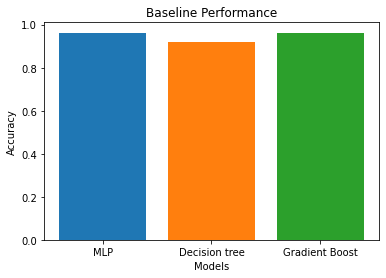

In [ ]:
plotModels(acc_baseline, 'Baseline Performance', 'Models', 'Accuracy')

# **Feature Selection**

**MLP**

Accuracy of MLP with 5 features: 0.8064608347627216
Accuracy of MLP with 7 features: 0.89937106918239
Accuracy of MLP with 10 features: 0.89937106918239

Updated baseline accuracy =  0.9591194968553459




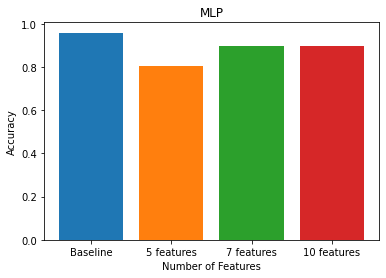

In [ ]:
acc_mlp=[]
acc_mlp.append(['Baseline', mlp_baseline])
for i in [5, 7, 10]:
  mlp_acc = feature_selection(i ,"MLP")
  print(f'Accuracy of MLP with {i} features:', mlp_acc)
  acc_mlp.append([f'{i} features', mlp_acc])

#Update baseline
mlp_update_baseline =mlp_acc_2 = update_baseline(acc_mlp)
print("\nUpdated baseline accuracy = ", mlp_update_baseline)
print('\n')
plotModels(acc_mlp, 'MLP', 'Number of Features', 'Accuracy')


**Decision Tree**

Accuracy of Decision Tree with 5 features: 0.7724413950829045
Accuracy of Decision Tree with 7 features: 0.8662092624356775
Accuracy of Decision Tree with 10 features: 0.888507718696398

Updated baseline accuracy =  0.9213836477987422




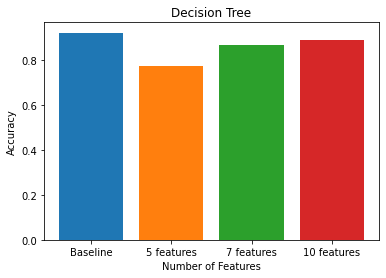

In [ ]:
acc_tree = []
acc_tree.append(['Baseline', tree_baseline])
for i in [5, 7, 10]:
  tree_acc = feature_selection(i, "tree")
  print(f'Accuracy of Decision Tree with {i} features:', tree_acc)
  acc_tree.append([f'{i} features', tree_acc])

#Update baseline
tree_update_baseline = tree_acc_2 = update_baseline(acc_tree)
print("\nUpdated baseline accuracy = ", tree_update_baseline)
print('\n')
plotModels(acc_tree, 'Decision Tree', 'Number of Features', 'Accuracy')

**Gradient Boost**

Accuracy of Gradient Boost with 5 features: 0.8370497427101201
Accuracy of Gradient Boost with 7 features: 0.9205260148656375
Accuracy of Gradient Boost with 10 features: 0.9408233276157805

Updated baseline accuracy =  0.9625500285877644




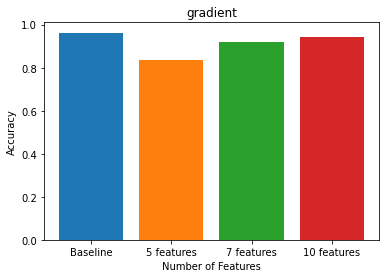

In [ ]:
acc_GB = []
acc_GB.append(['Baseline', GB_baseline])
for i in [5, 7, 10]:
  GB_acc = feature_selection(i, "gradient")
  print(f'Accuracy of Gradient Boost with {i} features:', GB_acc)
  acc_GB.append([f'{i} features', GB_acc])

#Update baseline
GB_update_baseline = gb_acc_2 = update_baseline(acc_GB) 
print("\nUpdated baseline accuracy = ", GB_update_baseline)
print('\n')
plotModels(acc_GB, 'gradient', 'Number of Features', 'Accuracy')

# **Plotting TSNE**

**Plot TSNE before applying feature selection on Train data**

In [ ]:
plotTSNE(x_train, y_train, 'Visualize the Train data before Feature Selection')

**Plot TSNE after applying feature selection on Train data**

In [ ]:
#5 features
x_train_reduced_5, x_test_reduced_5 = feature_selection(5)
plotTSNE(x_train_reduced_5, y_train, 'Visualize best 5 feature combinations for Train data')

#7 features
x_train_reduced_7, x_test_reduced_7 = feature_selection(7)
plotTSNE(x_train_reduced_7, y_train ,'Visualize best 7 feature combinations for Train data')

#10 features
x_train_reduced_10, x_test_reduced_10 = feature_selection(10)
plotTSNE(x_train_reduced_10, y_train, 'Visualize best 10 feature combinations for Train data')

**Plot TSNE before applying feature selection on Test data**

In [ ]:
plotTSNE(x_test, y_test, 'Visualize the Test data before Feature Selection')

**Plot TSNE after applying feature selection on Test data**

In [ ]:
#5 features
x_train_reduced_5, x_test_reduced_5 = feature_selection(5)
plotTSNE(x_test_reduced_5, y_test, 'Visualize best 5 feature combinations for Test data')

#7 features
x_train_reduced_7, x_test_reduced_7 = feature_selection(7)
plotTSNE(x_test_reduced_7, y_test ,'Visualize best 7 feature combinations for Test data')

#10 features
x_train_reduced_10, x_test_reduced_10 = feature_selection(10)
plotTSNE(x_test_reduced_10, y_test, 'Visualize best 10 feature combinations for Test data')

# **Hyperparameter Tuning**

# MLP

[['Baseline', 0.9591194968553459], ['relu', 0.9639794168096055], ['logistic', 0.9602630074328188], ['tanh', 0.9591194968553459]]

Updated baseline accuracy =  0.9639794168096055


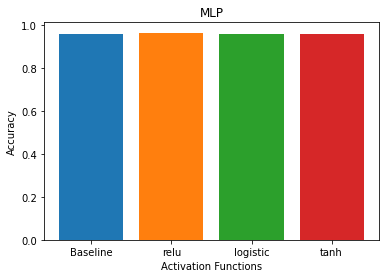

In [ ]:
#Hyperparameter: Activation Functions
MLP_af = []
MLP_af.append(['Baseline', mlp_update_baseline])

for i in ['relu', 'logistic', 'tanh']:
  mlp_clf = MLPClassifier(learning_rate_init=0.1, max_iter=1000, activation= i, random_state=rs).fit(x_train, y_train)
  y_pred_mlp = mlp_clf.predict(x_test)
  accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
  MLP_af.append([i, accuracy_mlp])

print(MLP_af)
#Update baseline
mlp_update_baseline = update_baseline(MLP_af) 
print("\nUpdated baseline accuracy = ", mlp_update_baseline)

plotModels(MLP_af, 'MLP', 'Activation Functions', 'Accuracy')


[['Baseline', 0.9639794168096055], ['0.1', 0.9639794168096055], ['0.001', 0.9714122355631789], ['0.0001', 0.9608347627215552]]

Updated baseline accuracy =  0.9714122355631789


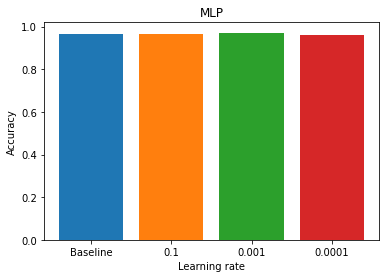

In [ ]:
##Hyperparameter: Learning rate
MLP_lr = []
MLP_lr.append(['Baseline', mlp_update_baseline])
for i in [0.1, 0.001, 0.0001]:
  mlp_clf = MLPClassifier(learning_rate_init= i, max_iter=1000, activation= 'relu', random_state=rs).fit(x_train, y_train)
  y_pred_mlp = mlp_clf.predict(x_test)
  accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
  MLP_lr.append([f'{i}', accuracy_mlp])

print(MLP_lr)
#Update baseline
mlp_update_baseline = mlp_acc_3 = update_baseline(MLP_lr)
print("\nUpdated baseline accuracy = ", mlp_update_baseline)

plotModels(MLP_lr, 'MLP', 'Learning rate', 'Accuracy')


# Decision Tree

[['Baseline', 0.9213836477987422], ['5', 0.76357918810749], ['6', 0.824757004002287], ['7', 0.8727844482561463]]

Updated baseline accuracy =  0.9213836477987422


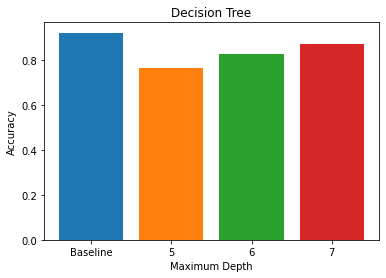

In [ ]:
#Hyperparameter: Max Depth
tree_max_dep = []
tree_max_dep.append(['Baseline', tree_update_baseline])
for i in range(5,8):
  tree_clf = DecisionTreeClassifier(random_state=rs, max_depth=i).fit(x_train, y_train)
  y_pred_tree = tree_clf.predict(x_test)
  accuracy_tree = accuracy_score(y_test, y_pred_tree)
  tree_max_dep.append([f'{i}', accuracy_tree])

print(tree_max_dep)
#Update baseline
tree_update_baseline = update_baseline(tree_max_dep)
print("\nUpdated baseline accuracy = ", tree_update_baseline)

plotModels(tree_max_dep, 'Decision Tree', 'Maximum Depth', 'Accuracy')


[['Baseline', 0.9213836477987422], ['2', 0.9139508290451687], ['3', 0.9150943396226415], ['4', 0.9093767867352773]]

Updated baseline accuracy =  0.9213836477987422


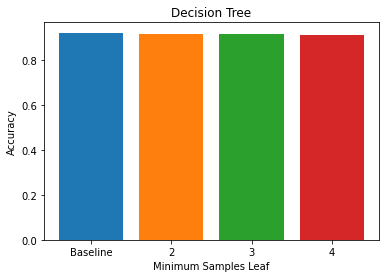

In [ ]:
#Hyperparameter: Minimum Samples Leaf
tree_min_sam = []
tree_min_sam.append(['Baseline', tree_update_baseline])
for i in range(2,5):
  tree_clf = DecisionTreeClassifier(random_state=rs, min_samples_leaf=i).fit(x_train, y_train)
  y_pred_tree = tree_clf.predict(x_test)
  accuracy_tree = accuracy_score(y_test, y_pred_tree)
  tree_min_sam.append([f'{i}', accuracy_tree])

print(tree_min_sam)
#Update baseline
tree_update_baseline = tree_acc_3 = update_baseline(tree_min_sam)
print("\nUpdated baseline accuracy = ", tree_update_baseline)

plotModels(tree_min_sam, 'Decision Tree', 'Minimum Samples Leaf', 'Accuracy')


# Gradient Boost

[['Baseline', 0.9625500285877644], ['0.01', 0.8727844482561463], ['0.19', 0.965980560320183], ['0.4', 0.6366495140080046]]

Updated baseline accuracy =  0.965980560320183


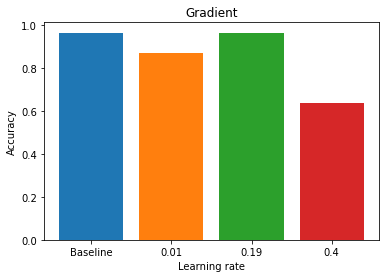

In [ ]:
#Hyperparameter: learning rate
GB_learning_rate= []
GB_learning_rate.append(['Baseline', GB_update_baseline])
learning_list= [0.01,0.19,0.4]

for i in learning_list :
  GB_clf = GradientBoostingClassifier (learning_rate=i , random_state=rs).fit(x_train, y_train)
  y_pred_GB = GB_clf.predict(x_test)
  accuracy_GB = accuracy_score(y_test,  y_pred_GB)
  GB_learning_rate.append([f'{i}', accuracy_GB])
  
print(GB_learning_rate)
#Update baseline
GB_update_baseline = update_baseline(GB_learning_rate)
print("\nUpdated baseline accuracy = ", GB_update_baseline)

plotModels(GB_learning_rate, 'Gradient', 'Learning rate', 'Accuracy')

[['Baseline', 0.965980560320183], ['200', 0.9642652944539737], ['50', 0.9502572898799314], ['10', 0.8730703259005146]]

Updated baseline accuracy =  0.965980560320183


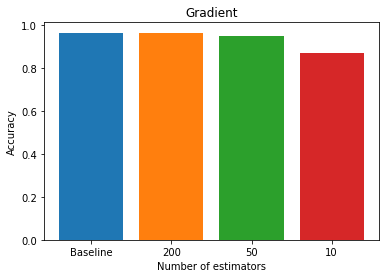

In [ ]:
#Hyperparameter: Number of estimators 
GB_n_estimators= []
GB_n_estimators.append(['Baseline', GB_update_baseline])
n_estimators_list=[200,50,10]

for i in n_estimators_list :
  GB_clf = GradientBoostingClassifier (n_estimators=i , random_state=rs).fit(x_train, y_train)
  y_pred_GB = GB_clf.predict(x_test)
  accuracy_GB = accuracy_score(y_test,  y_pred_GB)
  GB_n_estimators.append([f'{i}', accuracy_GB])
  

print(GB_n_estimators)
#Update baseline
GB_update_baseline = gb_acc_3 = update_baseline(GB_n_estimators)
print("\nUpdated baseline accuracy = ", GB_update_baseline)

plotModels(GB_n_estimators, 'Gradient', 'Number of estimators', 'Accuracy')

# Plotting Final updated accuracies for the 3 models

(['MLP', 0.9591194968553459], ['Decision tree', 0.9213836477987422], ['Gradient boost', 0.965980560320183])


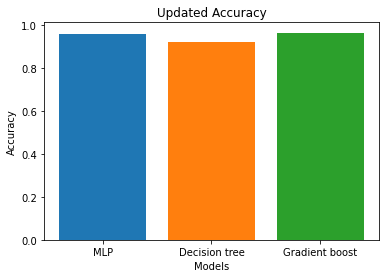

In [ ]:
#Q3
Tuning_baseline=(['MLP',mlp_update_baseline],['Decision tree',tree_update_baseline],['Gradient boost', GB_update_baseline])
print(Tuning_baseline)
plotModels(Tuning_baseline, 'Updated Accuracy', 'Models', 'Accuracy')

# **Stacking**

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

estimators = [ 
               ('MLP', MLPClassifier(learning_rate_init= 0.1, max_iter=1000, activation= 'relu', random_state=rs)),
               ('Gradient Boost', GradientBoostingClassifier (learning_rate=0.19 ,n_estimators=100 ,max_depth=3 , random_state=rs)),
              ( 'Decision Tree', DecisionTreeClassifier(random_state=rs))
               ]

Stacking_clf = StackingClassifier(estimators=estimators).fit(x_train, y_train)
y_pred_stacking = Stacking_clf.predict(x_test)
accuracy_stacking = accuracy_score(y_test,  y_pred_stacking)
print("Accuracy = ", accuracy_stacking)

print("\n Stacking classification report :\n\n\n" ,metrics.classification_report(y_pred_stacking , y_test))


Accuracy =  0.9751286449399656

 Stacking classification report :


               precision    recall  f1-score   support

           0       0.95      1.00      0.98       346
           1       0.98      0.91      0.95       392
           2       0.99      0.98      0.98       368
           3       0.99      0.98      0.98       340
           4       0.99      0.98      0.99       366
           5       0.98      1.00      0.99       328
           6       1.00      0.99      1.00       338
           7       0.91      0.99      0.95       333
           8       1.00      0.95      0.97       354
           9       0.97      0.98      0.97       333

    accuracy                           0.98      3498
   macro avg       0.98      0.98      0.98      3498
weighted avg       0.98      0.98      0.98      3498



# Random Forest

In [ ]:
  from sklearn.ensemble import RandomForestClassifier
  
  RF_clf = RandomForestClassifier( random_state=rs).fit (x_train, y_train)
  y_pred_RF = RF_clf.predict(x_test)
  accuracy_RF = accuracy_score(y_test,  y_pred_RF)

In [ ]:
  accuracy_RF

0.9631217838765008

# **Accuracy Bar Chart for All Steps**

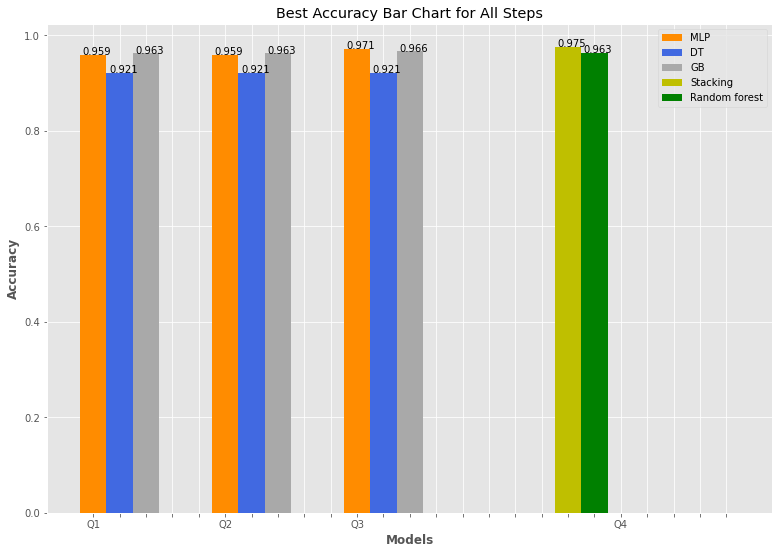

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create bars
MLP_bar = [mlp_acc_1, mlp_acc_2, mlp_acc_3, 0,0]
DT_bar = [tree_acc_1, tree_acc_2, tree_acc_3, 0,0]
GB_bar = [gb_acc_1, gb_acc_2, gb_acc_3, 0,0]
stacking_bar=[0,0,0,accuracy_stacking,0]
rf_bar=[0,0 ,0 ,  accuracy_RF ,0 ]

bars =  MLP_bar + DT_bar + GB_bar + stacking_bar + rf_bar
 

plt.figure(figsize=(13,9))

# The X position of bars
r1 = [1,6,11,16,21]
r2 = [2,7,12,17,22]
r3 = [3,8,13,18,23]
r4 = [4,9,14,19,24]
r5= [5,10,15,20,25]
r = r1 + r2 + r3 + r4 + r5
 
# Create barplot
plt.bar(r1, MLP_bar,1,color='darkorange', label='MLP')
plt.bar(r2, DT_bar ,1,color='royalblue', label='DT')
plt.bar(r3, GB_bar, 1,color='darkgray', label='GB')
plt.bar(r4, stacking_bar,1,color='y', label='Stacking')
plt.bar(r5,rf_bar,1,color='green', label='Random forest')
 
#Create labels
#round(float_num, num_of_decimals)
label = [round(mlp_acc_1, 3), round(mlp_acc_2, 3), round(mlp_acc_3, 3),'','', round(tree_acc_1, 3), round(tree_acc_2, 3), round(tree_acc_3, 3), '','',
         round(gb_acc_1, 3), round(gb_acc_2, 3), round(gb_acc_3, 3),  '','',   '','','', round(accuracy_stacking, 3),'' ,'' ,'' ,'',round(accuracy_RF, 3) ,''  ]

#Text on the top of each bar
for i in range(len(r)):
    plt.text(x = r[i]-0.4, y = bars[i], s = label[i], size = 10)

plt.xlabel('Models', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.title("Best Accuracy Bar Chart for All Steps")
plt.legend(loc='best', bbox_to_anchor=(0.5, 0.5, 0.5, 0.5))

Models = ['Q1', 'Q2', 'Q3' , '', 'Q4']
plt.xticks(r  , Models)
 
plt.show()

# **Confusion Matrices for Best 2 Approaches**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sn

**1- Stacking**

Stacking confusion matrix is :

 [[346   0   0   0   0   0   0   0   0   0]
 [  0 358   4   3   1   0   0  22   0   4]
 [  0   4 360   0   0   0   0   4   0   0]
 [  0   0   0 332   0   4   0   0   0   4]
 [  0   1   0   0 360   0   0   5   0   0]
 [  0   0   0   0   1 327   0   0   0   0]
 [  0   0   0   0   2   0 336   0   0   0]
 [  0   1   0   0   0   1   0 330   0   1]
 [ 17   0   0   0   0   0   0   0 336   1]
 [  0   0   0   1   0   3   0   3   0 326]] 




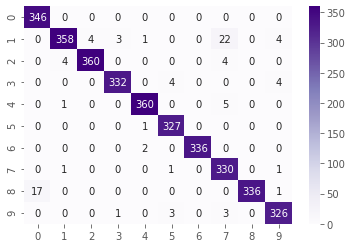

In [ ]:
print("Stacking confusion matrix is :\n\n" ,confusion_matrix(y_pred_stacking , y_test),"\n\n")

con=confusion_matrix(y_pred_stacking , y_test)

sn.heatmap(con,annot=True,cmap='Purples',fmt= 'd')

**2- MLP**

\MLP nclassification report :


               precision    recall  f1-score   support

           0       0.94      0.99      0.97       344
           1       0.97      0.91      0.94       388
           2       0.99      0.96      0.98       376
           3       0.99      0.98      0.98       339
           4       0.96      0.99      0.98       351
           5       0.97      0.97      0.97       335
           6       0.99      0.99      0.99       334
           7       0.92      0.98      0.95       341
           8       0.99      0.93      0.96       356
           9       0.97      0.98      0.97       334

    accuracy                           0.97      3498
   macro avg       0.97      0.97      0.97      3498
weighted avg       0.97      0.97      0.97      3498

MLP confusion matrix is :

 [[342   0   0   0   0   0   0   0   2   0]
 [  0 352   2   2   4   2   2  19   0   5]
 [  0   9 361   0   0   0   0   5   1   0]
 [  0   0   0 332   0   5   1   0   0   1]
 [  0   

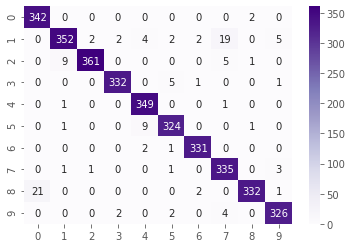

In [ ]:
mlp_clf = MLPClassifier(learning_rate_init= 0.01, max_iter=1000, activation= 'relu', random_state=rs).fit(x_train, y_train)
y_pred_mlp = mlp_clf.predict(x_test)

print("\MLP nclassification report :\n\n\n" ,metrics.classification_report(  y_pred_mlp , y_test))

print("MLP confusion matrix is :\n\n" ,confusion_matrix(  y_pred_mlp , y_test),"\n\n")

con=confusion_matrix(  y_pred_mlp , y_test)

sn.heatmap(con,annot=True,cmap='Purples',fmt= 'd')